### Feature Importances, Annova Based F-Values & P-Values

In [11]:
import sys
main_path = "../../.."
sys.path.append(main_path)

import seaborn as sns
import numpy as np
import pandas as pd
import yaml
from sklearn.feature_selection import f_classif
from src.scripts.common_figures import Figures

with open(f'{main_path}/config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
decimal_forms = config['decimal']
decimal_forms_inverse = {str(int(v)):k for k,v in decimal_forms.items()}

In [12]:
figures = Figures()
sns.set_context('poster', font_scale=0.8)

In [13]:
df_path = f"{main_path}/data/processed/dataframes"

cdt_di_fi_ohe = pd.read_csv(f"{df_path}/cdt_di_fi_ohe.csv")
targets = pd.read_csv(f"{df_path}/targets.csv").values.ravel()

f_, p_ = f_classif(cdt_di_fi_ohe.values, targets)

In [14]:
converted_columns = []

for clm in cdt_di_fi_ohe.columns:
    splt_clm = clm.split('_')
    decoded_value = decimal_forms_inverse.get(splt_clm[1], None)
    if decoded_value is not None:
        converted_columns.append(f"{splt_clm[0]}_{decoded_value}")
    else:
        converted_columns.append(clm)

converted_columns = np.array(converted_columns)    

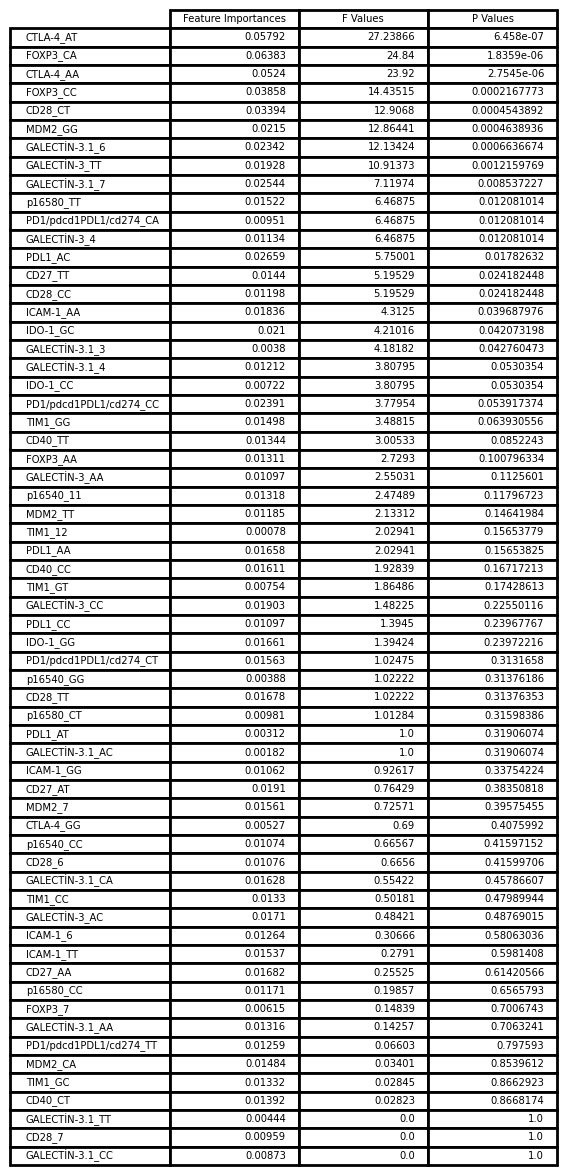

In [15]:
save = f"{main_path}/figures/table_for_cdt_di_fi_ohe.png"
table = figures.create_table(converted_columns, cdt_di_fi_ohe.values, targets, f_, p_,
                            save=save)